<a href="https://colab.research.google.com/github/mikonistealscode/dl_lab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Create Synthetic Data
def create_data():
    X = np.random.randn(1000,10)
    y = np.random.randn(1000,1)
    return X,y

# 2. Define a simple deep neural network
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ])
    return model

# 3.
def train_model_with_history(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer, loss='mean_squared_error')
  history=[]
  for epoch in range(epochs):
    hist = model.fit(X,y, batch_size = batch_size, epochs=1,verbose=0)
    loss = hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} Loss:{loss:.4f}")
  return history

# 4. Compare performance of SGD and Adam
X,y = create_data()
model_sgd = create_model()
model_adam = create_model()

optimizer_sgd = optimizers.SGD(learning_rate = 0.01)
optimizer_adam = optimizers.Adam(learning_rate = 0.001)

epochs = 50
batch_size = 32

print("\nTraining with SGD Optimizer:")
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, "SGD")
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, "Adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:
Epoch 1/50 - SGD Loss:1.1164
Epoch 2/50 - SGD Loss:1.0742
Epoch 3/50 - SGD Loss:1.0590
Epoch 4/50 - SGD Loss:1.0500
Epoch 5/50 - SGD Loss:1.0397
Epoch 6/50 - SGD Loss:1.0314
Epoch 7/50 - SGD Loss:1.0253
Epoch 8/50 - SGD Loss:1.0188
Epoch 9/50 - SGD Loss:1.0117
Epoch 10/50 - SGD Loss:1.0065
Epoch 11/50 - SGD Loss:1.0020
Epoch 12/50 - SGD Loss:0.9966
Epoch 13/50 - SGD Loss:0.9952
Epoch 14/50 - SGD Loss:0.9870
Epoch 15/50 - SGD Loss:0.9842
Epoch 16/50 - SGD Loss:0.9782
Epoch 17/50 - SGD Loss:0.9757
Epoch 18/50 - SGD Loss:0.9715
Epoch 19/50 - SGD Loss:0.9680
Epoch 20/50 - SGD Loss:0.9631
Epoch 21/50 - SGD Loss:0.9578
Epoch 22/50 - SGD Loss:0.9559
Epoch 23/50 - SGD Loss:0.9516
Epoch 24/50 - SGD Loss:0.9498
Epoch 25/50 - SGD Loss:0.9451
Epoch 26/50 - SGD Loss:0.9416
Epoch 27/50 - SGD Loss:0.9385
Epoch 28/50 - SGD Loss:0.9352
Epoch 29/50 - SGD Loss:0.9329
Epoch 30/50 - SGD Loss:0.9281
Epoch 31/50 - SGD Loss:0.9245
Epoch 32/50 - SGD Loss:0.9233
Epoch 33/50 - SGD L

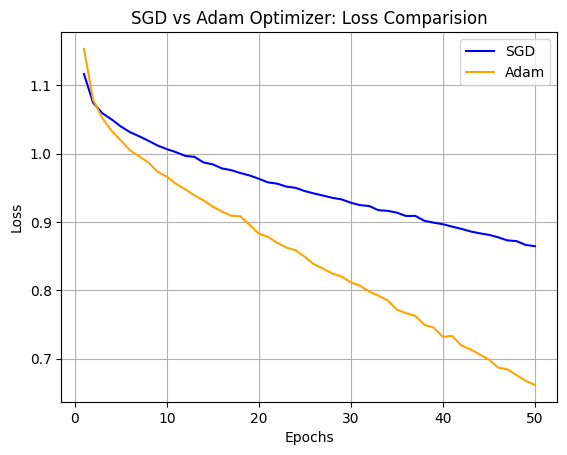

In [ ]:
#5. Plot the loss curves for comparision
plt.plot(range(1, epochs+1), sgd_loss, label="SGD", color="blue")
plt.plot(range(1, epochs+1), adam_loss, label="Adam", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD vs Adam Optimizer: Loss Comparision")
plt.legend()
plt.grid(True)
plt.show()

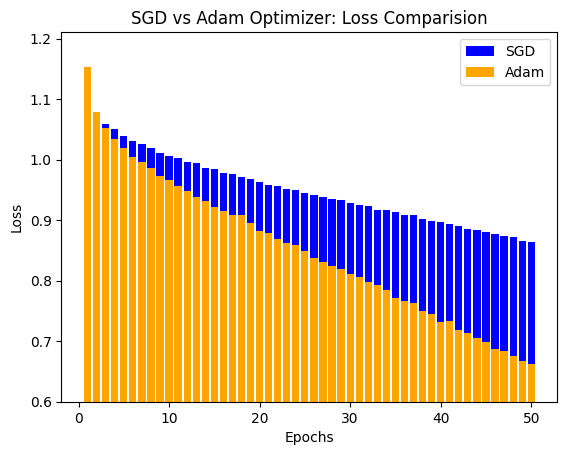

In [ ]:
plt.bar(range(1, epochs+1), sgd_loss, label="SGD", color="blue")
plt.bar(range(1, epochs+1), adam_loss, label="Adam", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0.6)
plt.title("SGD vs Adam Optimizer: Loss Comparision")
plt.legend()
plt.show()

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Create Synthetic Data
def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

# 2. Define a simple deep neural network
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ])
    return model

# 3. Train model with history and timing
def train_model_with_history(model, optimizer, X_train, y_train, batch_size, epochs, optimizer_name):
    model.compile(optimizer, loss='mean_squared_error')
    history = []

    start_time = time.time()  # Track start time
    for epoch in range(epochs):
        hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} Loss: {loss:.4f}")

    end_time = time.time()  # Track end time
    training_time = end_time - start_time  # Total time for training

    return history, training_time

# 4. Compare performance of SGD, Adam, RMSprop, and Adagrad
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

optimizers_list = [
    ('SGD', optimizers.SGD(learning_rate=0.01)),
    ('Adam', optimizers.Adam(learning_rate=0.001)),
    ('RMSprop', optimizers.RMSprop(learning_rate=0.001)),
    ('Adagrad', optimizers.Adagrad(learning_rate=0.01))
]

epochs = 50
batch_size = 32

results = {}

for optimizer_name, optimizer in optimizers_list:
    print(f"\nTraining with {optimizer_name} Optimizer:")

    # Create and train the model
    model = create_model()
    loss_history, training_time = train_model_with_history(model, optimizer, X_train, y_train, batch_size, epochs, optimizer_name)

    # Evaluate the model on test data
    y_pred = model.predict(X_test)
    test_loss = mean_squared_error(y_test, y_pred)

    # Save results
    results[optimizer_name] = {
        'loss_history': loss_history,
        'training_time': training_time,
        'final_test_loss': test_loss
    }


Training with SGD Optimizer:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50 - SGD Loss: 1.0419
Epoch 2/50 - SGD Loss: 1.0047
Epoch 3/50 - SGD Loss: 0.9838
Epoch 4/50 - SGD Loss: 0.9711
Epoch 5/50 - SGD Loss: 0.9615
Epoch 6/50 - SGD Loss: 0.9541
Epoch 7/50 - SGD Loss: 0.9459
Epoch 8/50 - SGD Loss: 0.9402
Epoch 9/50 - SGD Loss: 0.9347
Epoch 10/50 - SGD Loss: 0.9278
Epoch 11/50 - SGD Loss: 0.9254
Epoch 12/50 - SGD Loss: 0.9193
Epoch 13/50 - SGD Loss: 0.9142
Epoch 14/50 - SGD Loss: 0.9112
Epoch 15/50 - SGD Loss: 0.9073
Epoch 16/50 - SGD Loss: 0.9032
Epoch 17/50 - SGD Loss: 0.8982
Epoch 18/50 - SGD Loss: 0.8974
Epoch 19/50 - SGD Loss: 0.8946
Epoch 20/50 - SGD Loss: 0.8915
Epoch 21/50 - SGD Loss: 0.8902
Epoch 22/50 - SGD Loss: 0.8850
Epoch 23/50 - SGD Loss: 0.8826
Epoch 24/50 - SGD Loss: 0.8801
Epoch 25/50 - SGD Loss: 0.8773
Epoch 26/50 - SGD Loss: 0.8732
Epoch 27/50 - SGD Loss: 0.8719
Epoch 28/50 - SGD Loss: 0.8679
Epoch 29/50 - SGD Loss: 0.8647
Epoch 30/50 - SGD Loss: 0.8636
Epoch 31/50 - SGD Loss: 0.8596
Epoch 32/50 - SGD Loss: 0.8590
Epoch 33/50 - SGD

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50 - Adam Loss: 1.0234
Epoch 2/50 - Adam Loss: 0.9567
Epoch 3/50 - Adam Loss: 0.9372
Epoch 4/50 - Adam Loss: 0.9254
Epoch 5/50 - Adam Loss: 0.9128
Epoch 6/50 - Adam Loss: 0.9034
Epoch 7/50 - Adam Loss: 0.8958
Epoch 8/50 - Adam Loss: 0.8852
Epoch 9/50 - Adam Loss: 0.8734
Epoch 10/50 - Adam Loss: 0.8657
Epoch 11/50 - Adam Loss: 0.8547
Epoch 12/50 - Adam Loss: 0.8459
Epoch 13/50 - Adam Loss: 0.8390
Epoch 14/50 - Adam Loss: 0.8300
Epoch 15/50 - Adam Loss: 0.8206
Epoch 16/50 - Adam Loss: 0.8151
Epoch 17/50 - Adam Loss: 0.8053
Epoch 18/50 - Adam Loss: 0.7963
Epoch 19/50 - Adam Loss: 0.7881
Epoch 20/50 - Adam Loss: 0.7848
Epoch 21/50 - Adam Loss: 0.7758
Epoch 22/50 - Adam Loss: 0.7642
Epoch 23/50 - Adam Loss: 0.7557
Epoch 24/50 - Adam Loss: 0.7497
Epoch 25/50 - Adam Loss: 0.7403
Epoch 26/50 - Adam Loss: 0.7338
Epoch 27/50 - Adam Loss: 0.7257
Epoch 28/50 - Adam Loss: 0.7156
Epoch 29/50 - Adam Loss: 0.7137
Epoch 30/50 - Adam Loss: 0.7012
Epoch 31/50 - Adam Loss: 0.6970
Epoch 32/50 - Ada

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50 - RMSprop Loss: 1.0074
Epoch 2/50 - RMSprop Loss: 0.9637
Epoch 3/50 - RMSprop Loss: 0.9457
Epoch 4/50 - RMSprop Loss: 0.9294
Epoch 5/50 - RMSprop Loss: 0.9167
Epoch 6/50 - RMSprop Loss: 0.9049
Epoch 7/50 - RMSprop Loss: 0.8977
Epoch 8/50 - RMSprop Loss: 0.8891
Epoch 9/50 - RMSprop Loss: 0.8791
Epoch 10/50 - RMSprop Loss: 0.8715
Epoch 11/50 - RMSprop Loss: 0.8639
Epoch 12/50 - RMSprop Loss: 0.8554
Epoch 13/50 - RMSprop Loss: 0.8452
Epoch 14/50 - RMSprop Loss: 0.8371
Epoch 15/50 - RMSprop Loss: 0.8349
Epoch 16/50 - RMSprop Loss: 0.8288
Epoch 17/50 - RMSprop Loss: 0.8227
Epoch 18/50 - RMSprop Loss: 0.8161
Epoch 19/50 - RMSprop Loss: 0.8102
Epoch 20/50 - RMSprop Loss: 0.8015
Epoch 21/50 - RMSprop Loss: 0.7972
Epoch 22/50 - RMSprop Loss: 0.7934
Epoch 23/50 - RMSprop Loss: 0.7837
Epoch 24/50 - RMSprop Loss: 0.7806
Epoch 25/50 - RMSprop Loss: 0.7723
Epoch 26/50 - RMSprop Loss: 0.7698
Epoch 27/50 - RMSprop Loss: 0.7632
Epoch 28/50 - RMSprop Loss: 0.7591
Epoch 29/50 - RMSprop Loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50 - Adagrad Loss: 1.0402
Epoch 2/50 - Adagrad Loss: 0.9878
Epoch 3/50 - Adagrad Loss: 0.9692
Epoch 4/50 - Adagrad Loss: 0.9583
Epoch 5/50 - Adagrad Loss: 0.9475
Epoch 6/50 - Adagrad Loss: 0.9392
Epoch 7/50 - Adagrad Loss: 0.9340
Epoch 8/50 - Adagrad Loss: 0.9281
Epoch 9/50 - Adagrad Loss: 0.9226
Epoch 10/50 - Adagrad Loss: 0.9185
Epoch 11/50 - Adagrad Loss: 0.9115
Epoch 12/50 - Adagrad Loss: 0.9081
Epoch 13/50 - Adagrad Loss: 0.9032
Epoch 14/50 - Adagrad Loss: 0.9005
Epoch 15/50 - Adagrad Loss: 0.8959
Epoch 16/50 - Adagrad Loss: 0.8922
Epoch 17/50 - Adagrad Loss: 0.8886
Epoch 18/50 - Adagrad Loss: 0.8857
Epoch 19/50 - Adagrad Loss: 0.8828
Epoch 20/50 - Adagrad Loss: 0.8797
Epoch 21/50 - Adagrad Loss: 0.8772
Epoch 22/50 - Adagrad Loss: 0.8735
Epoch 23/50 - Adagrad Loss: 0.8719
Epoch 24/50 - Adagrad Loss: 0.8693
Epoch 25/50 - Adagrad Loss: 0.8656
Epoch 26/50 - Adagrad Loss: 0.8639
Epoch 27/50 - Adagrad Loss: 0.8611
Epoch 28/50 - Adagrad Loss: 0.8590
Epoch 29/50 - Adagrad Loss: 0

In [3]:
for optimizer_name, result in results.items():
    print(f"{optimizer_name}:")
    print(f"  Training Time: {result['training_time']:.2f} seconds")
    print(f"  Final Test Loss: {result['final_test_loss']:.4f}\n")

SGD:
  Training Time: 6.14 seconds
  Final Test Loss: 1.0496

Adam:
  Training Time: 8.69 seconds
  Final Test Loss: 1.1685

RMSprop:
  Training Time: 7.51 seconds
  Final Test Loss: 1.1285

Adagrad:
  Training Time: 9.56 seconds
  Final Test Loss: 0.9791



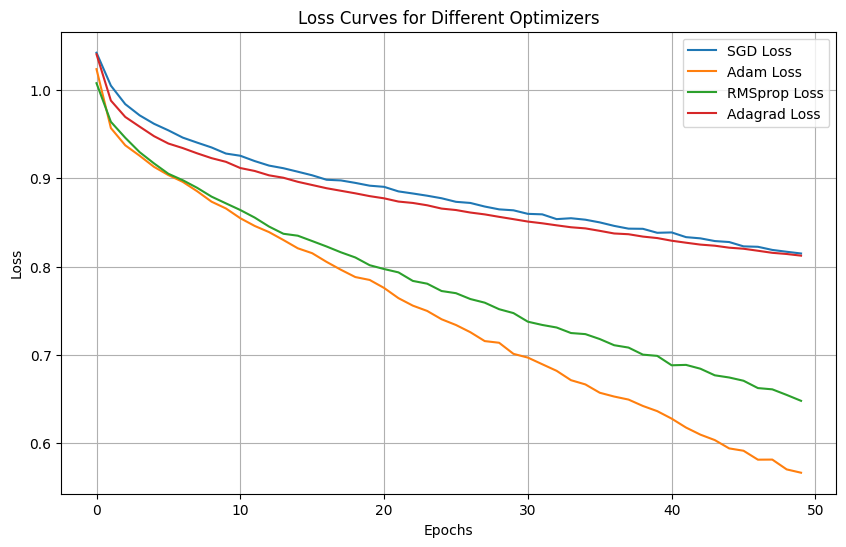

In [4]:
plt.figure(figsize=(10, 6))
for optimizer_name, result in results.items():
    plt.plot(result['loss_history'], label=f'{optimizer_name} Loss')
plt.title('Loss Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

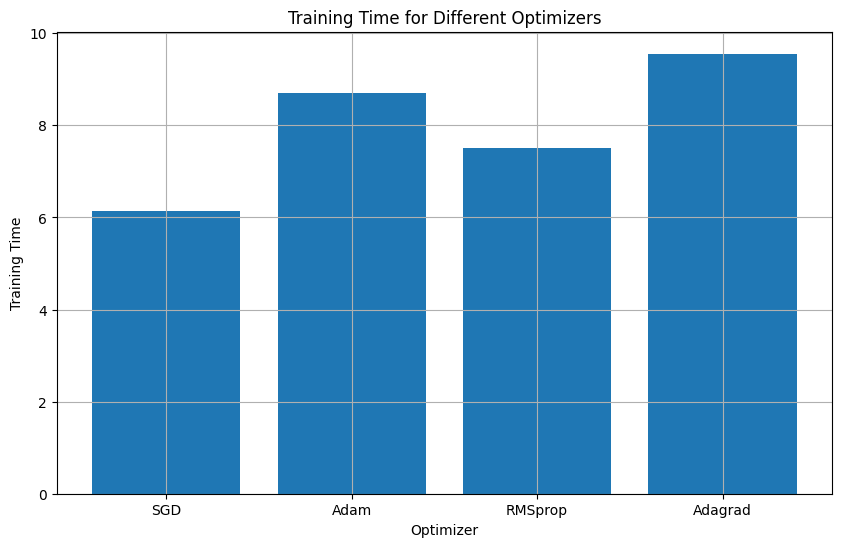

In [12]:
plt.figure(figsize=(10, 6))
# for optimizer_name, result in results.items():
training_times = [result['training_time'] for result in results.values()]
plt.bar(list(results.keys()), training_times)
# , label=f'{optimizer_name} Training Time')
plt.title('Training Time for Different Optimizers')
plt.xlabel('Optimizer')
plt.ylabel('Training Time')
# plt.legend()
plt.grid(True)
plt.show()